# Electricity & Weather Data Analysis

# Introduction
The [Energy_Use_Info](https://github.com/MichaelSalata/Energy_Use_Info) is meant to gather insights on electricity usage.

This notebook looks for insights into electricity usage relative to weather data.

## Data
* This notebook uses data cleaned with "green_button_data_cleaning.ipynb" aka:  clean_energy_use_*.csv
* This notebook uses data cleaned with "weather_data_cleaning.ipynb.ipynb" aka: clean_weather_*.csv


## My Energy Data Source
Currently, the data is from my energy company(ComEd) from the past year. 10_22_2022 to 10_22_2023
Data from the [My Green Button](https://secure.comed.com/MyAccount/MyBillUsage/pages/secure/GreenButtonConnectDownloadMyData.aspx) webpage on the ComEd website.

## My Weather Data Source
My weather data was collected using [Meteostat](https://github.com/meteostat/meteostat-python). The Meteostat Python library provides a simple API for accessing open weather and climate data. The historical observations and statistics are collected by Meteostat from different public interfaces, most of which are governmental.

Among the data sources are national weather services like the National Oceanic and Atmospheric Administration (NOAA) and Germany's national meteorological service (DWD).

# Data Column Descriptions

## energy_df
* **DATE**: Day recorded
* **START_TIME**: start of recording (Date Hour:Minutes:Seconds)
* **END_TIME**: end of recording (Date Hour:Minutes:Seconds)
* **USAGE**: Electric usage (kWh)
* **COST**: amount charged for energy usage (USD)

## weather_df
src: [Meteostat Documentation](https://dev.meteostat.net/python/hourly.html#data-structure)

| | | |
|-|-|-|
|**Column**|**Description**|**Type**|
|**time**|datetime of the observation|Datetime64|
|**temp**|air temperature in *°C*|Float64|
|**dwpt**|dew point in *°C*|Float64|
|**rhum**|relative humidity in percent (*%*)|Float64|
|**prcp**|one hour precipitation total in *mm*|Float64|
|**wdir**|average wind direction in degrees (*°*)|Float64|
|**wspd**|average wind speed in *km/h*|Float64|
|**pres**|average sea-level air pressure in *hPa*|Float64|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import clean_energy_use spreadsheet from 'data' directory

# Define the directory path and the regular expression pattern
import glob
directory_path = "./data"
file_pattern = "clean_energy_use*.csv"

# Use glob.glob to match filenames based on the pattern
file_path = glob.glob(f"{directory_path}/{file_pattern}")[0]
energy_df = pd.read_csv(filepath_or_buffer=file_path)
energy_df.info()
energy_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17517 entries, 0 to 17516
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_TIME  17517 non-null  object 
 1   DATE        17517 non-null  object 
 2   END_TIME    17517 non-null  object 
 3   USAGE       17517 non-null  float64
 4   COST        17517 non-null  float64
dtypes: float64(2), object(3)
memory usage: 684.4+ KB


,START_TIME,DATE,END_TIME,USAGE,COST
0,2022-10-22 00:00:00,2022-10-22 00:00:00,2022-10-22 00:29:00,0.11,0.01
1,2022-10-22 00:30:00,2022-10-22 00:00:00,2022-10-22 00:59:00,0.13,0.02
2,2022-10-22 01:00:00,2022-10-22 00:00:00,2022-10-22 01:29:00,0.09,0.01
3,2022-10-22 01:30:00,2022-10-22 00:00:00,2022-10-22 01:59:00,0.20,0.02
4,2022-10-22 02:00:00,2022-10-22 00:00:00,2022-10-22 02:29:00,0.10,0.01


In [3]:
# Import clean_weather spreadsheet from 'data' directory

# Define the directory path and the regular expression pattern
import glob
directory_path = "./data"
file_pattern = "clean_weather*.csv"

# Use glob.glob to match filenames based on the pattern
file_path = glob.glob(f"{directory_path}/{file_pattern}")[0]
weather_df = pd.read_csv(filepath_or_buffer=file_path)
weather_df.info()
weather_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    8785 non-null   object 
 1   temp    8785 non-null   float64
 2   dwpt    8785 non-null   float64
 3   rhum    8785 non-null   float64
 4   prcp    8785 non-null   float64
 5   wdir    8785 non-null   float64
 6   wspd    8785 non-null   float64
 7   pres    8785 non-null   float64
dtypes: float64(7), object(1)
memory usage: 549.2+ KB


,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2022-10-21 00:00:00,13.0,1.1,44.0,0.0,190.0,7.6,1008.0
1,2022-10-21 01:00:00,10.7,1.0,51.0,0.0,160.0,7.6,1008.0
2,2022-10-21 02:00:00,9.0,1.5,59.0,0.0,180.0,5.4,1008.0
3,2022-10-21 03:00:00,9.0,1.5,59.0,0.0,180.0,5.4,1008.0
4,2022-10-21 04:00:00,7.6,1.5,65.0,0.0,170.0,5.4,1008.0


## Observations & TODOs

- [x] convert the time/START_TIME cols into Datetime objs
- [x] convert half-hour data granularity of the energy_df into 1hr rows
- [x] Merge the dataset on the time start of each row
- [x] calculate a temperature_feel col from weather data
- [x] analyze correlations between weather variables and electricty usage
- [x] vizualize correlations
- [x] analyze correlations
- [x] vizualize: xaxis:bucket temperatures every 10F, yaxis:electricity usage

In [4]:
# convert the time cols into Datetime objs
weather_df['time'] = pd.to_datetime(weather_df['time'], format='%Y-%m-%d %H:%M:%S')
print(weather_df['time'].dtypes)
weather_df.head(4)

datetime64[ns]


,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2022-10-21 00:00:00,13.0,1.1,44.0,0.0,190.0,7.6,1008.0
1,2022-10-21 01:00:00,10.7,1.0,51.0,0.0,160.0,7.6,1008.0
2,2022-10-21 02:00:00,9.0,1.5,59.0,0.0,180.0,5.4,1008.0
3,2022-10-21 03:00:00,9.0,1.5,59.0,0.0,180.0,5.4,1008.0


In [5]:
# convert the START_TIME col into Datetime objs
energy_df['START_TIME'] = pd.to_datetime(energy_df['START_TIME'], format='%Y-%m-%d %H:%M:%S')
print(energy_df['START_TIME'].dtypes)
energy_df.head(4)

datetime64[ns]


,START_TIME,DATE,END_TIME,USAGE,COST
0,2022-10-22 00:00:00,2022-10-22 00:00:00,2022-10-22 00:29:00,0.11,0.01
1,2022-10-22 00:30:00,2022-10-22 00:00:00,2022-10-22 00:59:00,0.13,0.02
2,2022-10-22 01:00:00,2022-10-22 00:00:00,2022-10-22 01:29:00,0.09,0.01
3,2022-10-22 01:30:00,2022-10-22 00:00:00,2022-10-22 01:59:00,0.20,0.02


In [6]:
# convert half-hour data granularity of the energy_df into 1hr rows
energy_df['HOUR'] = energy_df['START_TIME'].dt.floor('H')
print(energy_df['HOUR'].dtypes)
energy_df.head(4)

datetime64[ns]


,START_TIME,DATE,END_TIME,USAGE,COST,HOUR
0,2022-10-22 00:00:00,2022-10-22 00:00:00,2022-10-22 00:29:00,0.11,0.01,2022-10-22 00:00:00
1,2022-10-22 00:30:00,2022-10-22 00:00:00,2022-10-22 00:59:00,0.13,0.02,2022-10-22 00:00:00
2,2022-10-22 01:00:00,2022-10-22 00:00:00,2022-10-22 01:29:00,0.09,0.01,2022-10-22 01:00:00
3,2022-10-22 01:30:00,2022-10-22 00:00:00,2022-10-22 01:59:00,0.20,0.02,2022-10-22 01:00:00


In [7]:
# convert half-hour data granularity of the energy_df into 1hr rows
energy_pivot = energy_df.pivot_table(index='HOUR', values=['USAGE', 'COST'], aggfunc='sum')
energy_pivot.reset_index(inplace=True)
print(energy_pivot.columns)
energy_pivot.head(2)

Index(['HOUR', 'COST', 'USAGE'], dtype='object')


,HOUR,COST,USAGE
0,2022-10-22 00:00:00,0.03,0.24
1,2022-10-22 01:00:00,0.03,0.29


In [8]:
energy_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   HOUR    8759 non-null   datetime64[ns]
 1   COST    8759 non-null   float64       
 2   USAGE   8759 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 205.4 KB


In [9]:
# convert HOUR col back to datetime
energy_pivot['HOUR'] = pd.to_datetime(energy_pivot['HOUR'], format='%Y-%m-%d %H:%M:%S')

In [10]:
# make sure 'time' columns for weather_df match the 'HOUR' col in energy_df
weather_df.head(3)

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2022-10-21 00:00:00,13.0,1.1,44.0,0.0,190.0,7.6,1008.0
1,2022-10-21 01:00:00,10.7,1.0,51.0,0.0,160.0,7.6,1008.0
2,2022-10-21 02:00:00,9.0,1.5,59.0,0.0,180.0,5.4,1008.0


In [11]:
# merge datasets
energy_weather_df = pd.merge(weather_df, energy_pivot, how='inner', left_on='time', right_on='HOUR')
energy_weather_df.head()

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,HOUR,COST,USAGE
0,2022-10-22 00:00:00,21.4,5.8,36.0,0.0,190.0,14.8,1007.0,2022-10-22 00:00:00,0.03,0.24
1,2022-10-22 01:00:00,19.6,6.1,41.0,0.0,180.0,16.6,1007.0,2022-10-22 01:00:00,0.03,0.29
2,2022-10-22 02:00:00,17.5,5.5,45.0,0.0,180.0,9.4,1008.0,2022-10-22 02:00:00,0.02,0.20
3,2022-10-22 03:00:00,14.0,5.2,55.0,0.0,160.0,11.2,1008.0,2022-10-22 03:00:00,0.02,0.09
4,2022-10-22 04:00:00,14.2,5.4,55.0,0.0,170.0,11.2,1009.0,2022-10-22 04:00:00,0.02,0.09


# Combining Wind & Temperature Columns
The speed our skin gains/loses temperature dictates how cold/hot an object feels.

* **example:** Clothing & Metal may be the temperatures but, our skin loses heat to Metal much faster & thus feels colder.

Higher wind speed increases temperature loss so, to represent how cold/hot the weather feels, I created a column with the **[Wind Chill equation](https://www.weather.gov/media/epz/wxcalc/windChill.pdf)** from the **National Weather Service**.

* National Weather Service [Wind Chill Calculator](https://www.weather.gov/epz/wxcalc_windchillm/)
* National Weather Service [Wind Chill Equation](https://www.weather.gov/media/epz/wxcalc/windChill.pdf)

In [12]:
# factor in the wind chill into the temperature to create a 'feel' column
# National Weather Service Calculator - https://www.weather.gov/epz/wxcalc_windchillm/
# National Weather Service Wind Chill Equation - https://www.weather.gov/media/epz/wxcalc/windChill.pdf

def calc_temp_feel(temp, wspd):
    condition = (temp > 10) | (wspd < 4.8)
    
    temp_f = (temp * 9/5) + 32   # convert Celsius to Farenheit
    w_mph = 0.621371 * wspd      # convert kmph to mph
    
    w_frac = w_mph**0.16
    feel_f = 35.74 + (0.6215*temp_f) - (35.75*w_frac) + (0.4275*temp_f*w_frac)
    # return (feel_f - 32) * 5/9     # converting back to Celsius
    return pd.Series(np.where(condition, temp, (feel_f - 32) * 5/9), index=temp.index)
    

In [13]:
# Apply the function to create the new 'feel' column
energy_weather_df['feel'] = calc_temp_feel(energy_weather_df['temp'], energy_weather_df['wspd'])

In [14]:
energy_weather_df.sample(10)

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,HOUR,COST,USAGE,feel
8437,2023-10-08 14:00:00,9.4,6.1,80.0,0.0,0.0,0.0,1016.0,2023-10-08 14:00:00,0.21,2.12,9.400000
6176,2023-07-06 09:00:00,21.5,21.5,100.0,0.0,310.0,9.4,1013.4,2023-07-06 09:00:00,0.08,0.80,21.500000
3923,2023-04-03 12:00:00,6.9,6.9,100.0,0.0,160.0,7.6,1010.0,2023-04-03 12:00:00,0.46,3.64,5.478448
6924,2023-08-06 13:00:00,21.6,20.4,93.0,0.0,350.0,5.4,1011.0,2023-08-06 13:00:00,0.05,0.49,21.600000
7838,2023-09-13 15:00:00,18.0,15.3,84.0,0.0,330.0,5.4,1020.0,2023-09-13 15:00:00,0.08,0.84,18.000000
3632,2023-03-22 09:00:00,5.0,5.0,100.0,0.0,160.0,16.6,1017.0,2023-03-22 09:00:00,0.28,2.18,1.528358
5527,2023-06-09 08:00:00,12.8,4.6,57.0,0.0,0.0,0.0,1014.0,2023-06-09 08:00:00,0.02,0.18,12.800000
3497,2023-03-16 18:00:00,8.2,6.7,90.0,0.0,190.0,18.4,1006.0,2023-03-16 18:00:00,0.35,2.75,5.293117
8221,2023-09-29 14:00:00,15.4,15.4,100.0,0.0,150.0,7.6,1021.0,2023-09-29 14:00:00,0.02,0.22,15.400000
8109,2023-09-24 22:00:00,26.0,14.2,48.0,0.0,130.0,13.0,1015.0,2023-09-24 22:00:00,0.04,0.39,26.000000


In [15]:
usage_corr = energy_weather_df.corr()['USAGE'].sort_values(ascending=False)
print(usage_corr)

USAGE    1.000000
COST     0.997469
wspd     0.335373
wdir     0.286017
pres     0.191690
rhum     0.091558
prcp    -0.055778
time    -0.620278
HOUR    -0.620278
dwpt    -0.795263
temp    -0.809782
feel    -0.827987
Name: USAGE, dtype: float64


# COST - USAGE correlation
Cost & USAGE are so tightly correlated that I will use these columns interchangably (choosing which variable feels more intuitive for the scenario).

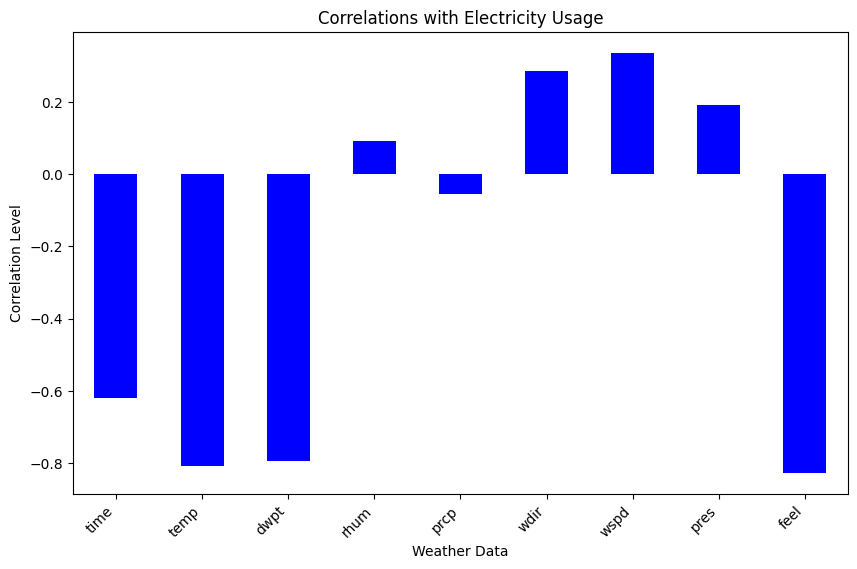

In [16]:
# Plot energy usage correlations with the weather columns
plt.figure(figsize=(10, 6))
weather_cols = weather_df.columns.tolist() + ['feel']
usage_corr[weather_cols].plot(kind='bar', color='blue')
plt.title('Correlations with Electricity Usage')
plt.xlabel('Weather Data')
plt.ylabel('Correlation Level')
plt.xticks(rotation=45, ha='right')
plt.show()

# Correlation Analysis: Usage & Weather
* strong correlations between temperature, dew point & feel
* weak correlation between windspeed & wind direction

## Inverse correlations with temp, dwpt & feel
* lower the temperature > higher the energy usage
Judging by how high our electricity bill usage was in the winter months, this makes sense. Although, our electricity bill on hot days should be higher because of air conditioning. This hot > higher electricity usage is a possible correlation. The inverse temp/usage correlation tells the whole story. 

## Wind Chill
Calculating the 'feel' of the weather seems like a great feature combination of the temp & wspd column. This would help in the precision of something like a Machine Learning model but, for these rough graphs, the 'feel' column doesn't add enough precision to justify the ambiguity the term 'feel' adds to future graphs.

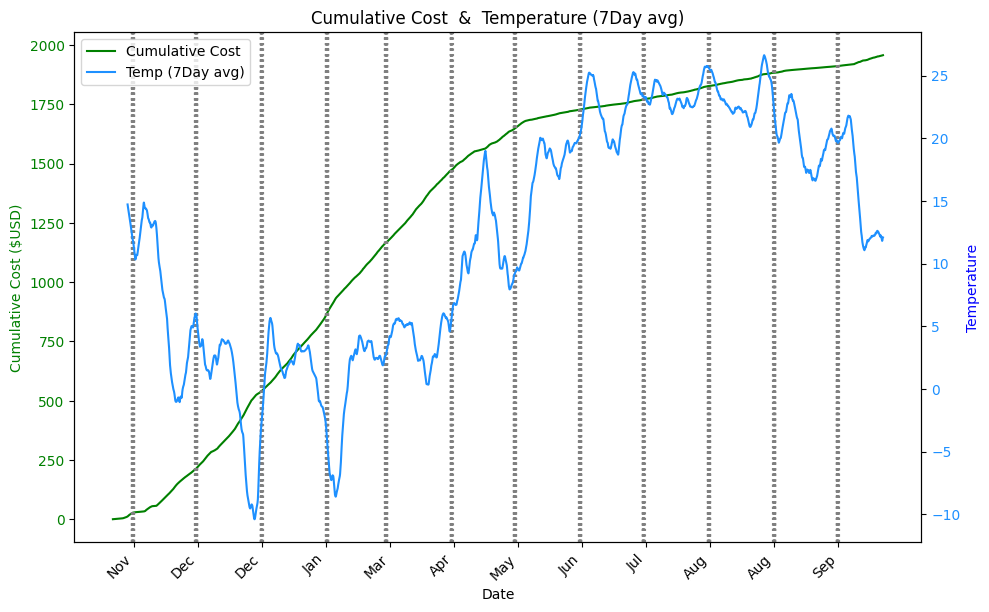

In [28]:
# Visualize the Cumulative Cost  &  rolling Temperature avg
# Calculate cumulative sum for 'COST'
# Calculate 14-day rolling sum for 'temp'
# since data is recorded 
hours=24
days=7
window_size0 = hours*days
window_name = "temp_"+str(days)+"_mean"

COST_Cumulative = energy_weather_df['COST'].cumsum()
rolling_avg_temp = energy_weather_df['temp'].rolling(window=window_size0).mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the cumulative sum for 'COST' on the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Cost ($USD)', color='green')
line1, = ax1.plot(energy_weather_df['time'], COST_Cumulative, label='Cumulative Cost', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Creating a secondary y-axis for the rolling avg of 'temp'
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature', color='blue')

# plotting rolling means of 'temp'
line2, = ax2.plot(energy_weather_df['time'], rolling_avg_temp, label='Temp ('+str(days)+'Day avg)', color='dodgerblue')
ax2.tick_params(axis='y', labelcolor='dodgerblue')

# Adding vertical lines for each month
for date in energy_weather_df['time'][energy_weather_df['time'].dt.is_month_end]:  # Adjust the frequency as needed
    ax1.axvline(x=date, color='gray', linestyle=':')
    
# Formatting x-axis tick labels with abbreviated month names
# label frequency should every ~30days
start = (30-20)*24   # the number of hours left in Oct
freq = 24*30 + 8    # average num of hours in a month
ax1.set_xticks(energy_weather_df['time'][start::freq])  # Adjust the frequency as needed
ax1.set_xticklabels(energy_weather_df['time'].dt.strftime('%b')[start::freq], rotation=45, ha='right')

fig.tight_layout()

# Include both lines in the legend
lines = [line1, line2]
# labels = [line.label for line in lines]
labels = [line1.get_label(), line2.get_label()]
ax1.legend(lines, labels, loc='upper left')

plt.title('Cumulative Cost  &  Temperature ('+str(days)+'Day avg)')
plt.show()


# Analysis - Cumulative Cost  &  Temperature (7 Day avg)
I was hoping to visualize the temperature/electricity_usage correlation. **NOTE:** USAGE & COST directly correlate.

* COST rises more steeply when the temperature is lower.
* The visualization misses the positive temp/usage correlation at higher temperatures.


posx and posy should be finite values
posx and posy should be finite values


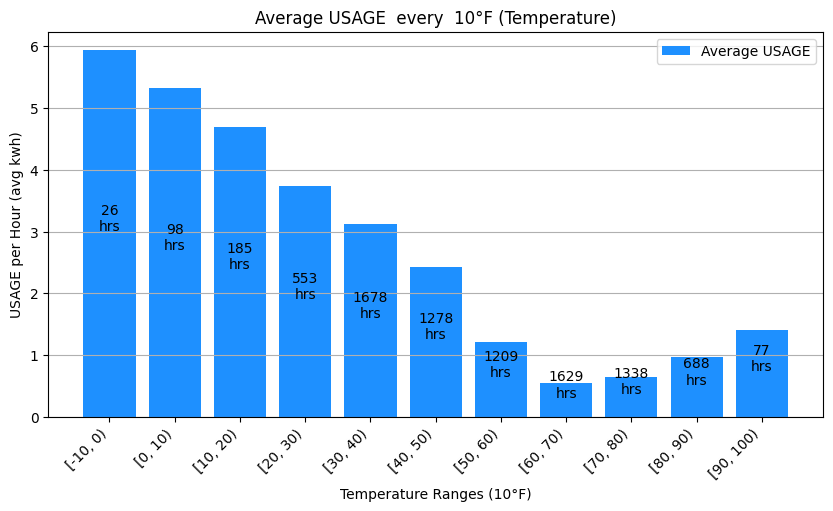

In [27]:
# graph the USAGE level for different temperature levels
# Convert 'temp' to Fahrenheit
energy_weather_df['temp_fahrenheit'] = (energy_weather_df['temp'] * 9/5) + 32

# Create temperature bins
temp_bins = list(range(-20, 110, 10))

# Categorize rows based on temperature bins
energy_weather_df['temp_bins'] = pd.cut(energy_weather_df['temp_fahrenheit'], bins=temp_bins, right=False)

# Group by temperature bins and calculate average 'USAGE' and count
average_data = energy_weather_df.groupby('temp_bins').agg({'USAGE': ['mean', 'count']}).reset_index()
average_data.columns = ['temp_bins', 'avg_USAGE', 'count']

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart
bars = ax1.bar(average_data['temp_bins'].astype(str), average_data['avg_USAGE'], color='dodgerblue', label='Average USAGE')
ax1.set_xlabel('Temperature Ranges (10°F)')
ax1.set_ylabel('USAGE per Hour (avg kwh)')

# Display the count on top of each bar
for bar, count in zip(bars, average_data['count']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height/2, f'{count}\nhrs', ha='center', va='bottom')

ax1.legend(loc='upper right')
ax1.grid(axis='y')

plt.title('Average USAGE  every  10°F (Temperature)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Analysis - Usage / 10F
* Indicates minimal energy usage when temperature is 60-70F.
* The farther the temperature gets from 60-70F range, the greater energy usage it takes for climate control.

## Heating takes more Energy than Cooling
* 50-60 and 70-80 ranges are ~10 degrees away from 60-70 but more energy is used at 50-60
* 40-50 and 80-90 ranges are ~20 degrees away from 60-70 but more energy is used at 40-50

## Future Analysis using 'hrs'
Number of hours spent at each temperature range could be used to get a how much energy is being spent to climate control at different temperatures. Those metrics could be used to do cost/benefit analysis of actions.

* e.g. How much total energy would be used using with different heaters could be calculated